## **Workflow (Data Preparation)**<br/>
Standardised Precipitation-Evapotranspiration Index

### **1. Data BMKG (Analysis)**

Sebelum lebih lanjut menghitung nilai SPEI, mari analisa data yang dikeluarkan BMKG :
| No | Label | Keterangan | Satuan |
|:---|:------------|:-----------------------------------|:----|
| 1  | **Tn**      | Temperatur minimum                 | °C  |
| 2  | **Tx**      | Temperatur maksimum                | °C  |
| 3  | **Tavg**    | Temperatur rata-rata               | °C  |
| 4  | **RH_avg**  | Kelembapan rata-rata               | °C  |
| 5  | **RR**      | Curah hujan                        | mm  |
| 6  | **ss**      | Lamanya penyinaran matahari        | jam |
| 7  | **ff_x**    | Kecepatan angin maksimum           | m/s |
| 8  | **ddd_x**   | Arah angin saat kecepatan maksimum | °   |
| 9  | **ff_avg**  | Kecepatan angin rata-rata          | m/s |
| 10 | **ddd_car** | Arah angin terbanyak               | °   |

Untuk menentukan nilai score SPEI, berdasarkan jurnal ini [[1]](https://journals.ametsoc.org/view/journals/clim/23/7/2009jcli2909.1.xml), dijelaskan bahwa SPEI membutuhkan nilai **siklus air regional** dalam suatu wilayah dengan formulanya berikut :
$$
D_{i} = P_{i} - PET_{i}
$$

Dimana, 

$P_{i}$ adalah *precipitation* atau curah hujan ✅<br/>
$PET_{i}$ adalah *potential evapotranspiration* atau potensi evapotranspirasi ❌

Selanjutnya, menggunakan formula seperti dijelaskan disini [https://spei.csic.es/home.html](https://spei.csic.es/home.html)

<small>[1] S. M. Vicente-Serrano, S. Beguería, and J. I. López-Moreno, “A Multiscalar Drought Index Sensitive to Global Warming: The Standardized Precipitation Evapotranspiration Index,” Journal of Climate, Apr. 01, 2010. https://doi.org/10.1175/2009jcli2909.1</small>

### **2. Potential Evaporation (ET)**

Sebenarnya banyak pendekatan yang bisa digunakan untuk menghitung nilai ini (berikut yang paling polular):
1. Thornthwaite
2. Penman-Monteith 
3. **Hargreaves** [2]

<small>[2] Hargreaves, G. H. and Samani, Z. A. (1982). Estimating potential evapotranspiration. Journal of the irrigation and Drainage Division, 108(3):225-230</small>

Metode lainnya :

| Method name       | Temperature | Relative Humidity | Solar Radiation | Windspeed | Latitude | Elevation | Benchmarked? |
|:------------------|:-------|:-----------|:-------|:-------|:-------|:-------|:------------------|
| Penman            | &check; $^a$ | &check; $^{b,c}$ | &check; $^d$ | &check;      | &check; $^d$ | &check; $^e$ | &check;           |
| Penman-Monteith   | &check; $^a$ | &check; $^{b,c}$ | &check; $^d$ | &check;      | &check; $^d$ | &check; $^e$ | &check;           |
| ASCE-PM           | &check; $^a$ | &check; $^{b,c}$ | &check; $^d$ | &check;      | &check; $^d$ | &check; $^e$ | &check;           |
| FAO-56            | &check; $^a$ | &check; $^{b,c}$ | &check; $^d$ | &check;      | &check; $^d$ | &check; $^e$ | &check;           |
| Priestley-Taylor  | &check;      | &check; $^h$     | &check; $^h$ | -      | &check; $^h$ | &check; $^e$ | &check;           |
| Kimberly-Penman   | &check; $^a$ | &check; $^{b,c}$ | &check; $^d$ | &check;      | &check; $^d$ | &check; $^e$ | -                 |
| Thom-Oliver       | &check; $^a$ | &check; $^{b,c}$ | &check; $^d$ | &check;      | &check; $^d$ | &check; $^e$ | -                 |
| Blaney-Criddle    | &check;      | - $^i$     | - $^i$ | - $^i$ | &check;      | -      | &check;           |
| Hamon             | &check;      | -          | -      | -      | &check;      | -      | &check;           |
| Romanenko         | &check;      | &check;          | -      | -      | -      | -      | &check;           |
| Linacre           | &check; $^j$ | -          | -      | -      | -      | &check;      | &check;           |
| Haude             | &check;      | &check; $^k$     | -      | -      | -      | -      | &check;           |
| Turc              | &check;      | &check;          | &check;      | -      | -      | -      | &check;           |
| Jensen-Haise      | &check;      | -          | &check; $^l$ | -      | &check; $^l$ | -      | &check;           |
| McGuinness-Bordne | &check;      | -          | -      | -      | &check;      | -      | &check;           |
| **Hargreaves**        | &check; $^m$ | -          | -      | -      | &check;      | -      | &check;           |
| FAO-24 radiation  | &check;      | &check;          | &check;      | &check;      | -      | &check; $^e$ | -                 |
| Abtew             | &check;      | -          | &check;      | -      | -      | -      | &check;         |
| Makkink           | &check;      | -          | &check;      | -      | -      | &check; $^e$ | &check;           |
| Oudin             | &check;      | -          | -      | -      | &check;      | -      | -                 |

Source : https://github.com/pyet-org/pyet

Alasan kenapa saya menggunakan **Hargreaves**
- Mendukung skala waktu **harian** dan bulanan

- Hanya memerlukan nilai **Temperature (Max) ✅** & **(Min) ✅** dan **Lintang (Latitude) ✅**

Formula-nya adalah sebagai berikut:
$$
E T_{0}=0.0023 R_{a}\left(\frac{T_{\max }+T_{\min }}{2}+17.8\right) \sqrt{T_{\max }-T_{\min }}
$$

dimana:

$ET_{o}$: nilai evaporasi dan transpirasi ($\frac{MJ}{m^2 d}$), <br/>
$T_{min}$: suhu minimum ($^oC$) ✅, <br/>
$T_{max}$: suhu maksimum ($^oC$) ✅, dan <br/>
**$R_{a}$: radiasi matahari ekstraterestrial harian ($\frac{MJ}{m^2 d}$) ❌**

Untuk mencari nilai $R_{a}$ menurut [3], bergantung pada garis lintang **(Latitude ✅)** geografis area tersebut dan hubungannya negatif (lebih rendah lokasi geografis menerima lebih banyak radiasi). 

<small>[3] Duffie, J. A., & Beckman, W. A. (2006). Solar engineering of thermal processes. In Intersciences Publication, USA (4th ed.). https://doi.org/April 15, 2013</small>

$$
R_{a}=\frac{1440}{\pi} G_{s} d_{r}\left[\omega_{s} \sin (\phi) \sin (\delta)+\sin \left(\omega_{s}\right) \cos (\phi) \cos (\delta)\right]
$$
dimana:
    
$G_{s}$: Konstanta surya yang merupakan jumlah radiasi matahari yang diterima di luar atmosfer bumi, diketahui (0.082 MJ/m2/d) ✅<br/>
$d_{r}$: Jarak relatif terbalik dari Bumi ke matahari (-), yang menggambarkan perubahan jarak antara Bumi dan matahari sepanjang tahun, ❌<br/>
$\delta$: (Delta) Sudut deklinasi matahari (dalam radian), yang menggambarkan posisi matahari relatif terhadap ekuator bumi, ❌<br/>
$\omega_{s}$: (Omega) Sudut matahari saat matahari terbenam (rad), ❌<br/>
$\phi$: Letak geografis lintang (rad) ✅

Dari formula ini, kita perlu mencari nilai $d_{r}$, $\delta$ dan $\omega_{s}$ menggunakan formula ini:
$$
d_{r}=1+0.033 \cos \left(\frac{2 \pi}{365} J\right)
$$
$$
\delta=0.409 \sin \left(\frac{2 \pi}{365} J-1.39\right)
$$
$$
\omega_{s}=\arccos [-\tan (\phi) \tan (\delta)]
$$

dimana:

J: Jumlah hari dalam tahun kalender (mulai dari 1 hingga 365 atau 366) ✅.

<small>[3] Duffie, J. A., & Beckman, W. A. (2006). Solar engineering of thermal processes. In Intersciences Publication, USA (4th ed.). https://doi.org/April 15, 2013</small>

#### **2.1. Calculate ET**

In [1]:
# %pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def evaporasi(Tn, Tx, Ta, lat):
    # selisih suhu harian tertinggi dan terendah
    dif = Tx - Tn
    # Ubah menjadi nol jika hasilnya kurang dari nol, karena perbedaan negatif tidak relevan untuk perhitungan penguapan
    dif = np.where(dif < 0, 0, dif)    
    # menghitung jumlah hari dalam setahun dari data yang diolah
    j = pd.to_datetime('today').dayofyear
    # Faktor dr dihitung berdasarkan hari dalam setahun tersebut untuk memperhitungkan perubahan jarak Bumi-Matahari
    dr = 1 + 0.033 * np.cos(2 * np.pi / 365 * j)
    # Nilai delta dihitung sebagai sudut matahari tengah hari relatif terhadap dataran bumi.
    delta = 0.409 * np.sin(2 * np.pi * j / 365 - 1.39)
    # Sudut lintang geografis (lat) diubah menjadi radian
    phi_rad = np.deg2rad(lat)
    # Sudut matahari terbit hingga terbenam (omega_s) dihitung berdasarkan sudut lintang dan sudut matahari tengah hari.
    omega_s = np.arccos(-1 * (np.tan(phi_rad) * np.tan(delta)))
    # Nilai bracket dihitung berdasarkan sudut matahari terbit hingga terbenam dan sudut lintang geografis.
    bracket = omega_s * np.sin(phi_rad) * np.sin(delta) + np.sin(omega_s) * np.cos(phi_rad) * np.cos(delta)
    # Radiasi matahari harian (R_a) dihitung berdasarkan faktor-faktor sebelumnya.
    R_a = 1440 * 0.0820 / np.pi * dr * bracket
    # Laju penguapan aktual (ET) dihitung menggunakan radiasi matahari harian, suhu udara rata-rata (Tavg), dan selisih suhu harian.
    ET = 0.0023 * R_a * (Ta + 17.8) * np.sqrt(dif)
    # Evap_m merupakan estimasi laju penguapan dalam satuan meter per hari, dihitung berdasarkan laju penguapan aktual (ET).
    return ET / (2.45 * 1000)

**a) Manual Input**

In [4]:
evap = evaporasi(Tn=23.4, Tx=28.2, Ta=26.6, lat=-0.48000)

print('PET = ' + str(evap))

PET = 0.003030577909757687


**b) Using Dataset**

In [6]:
df = pd.read_csv('../data/test/apt-pranoto.csv', sep=";")
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y', errors='coerce')
df = df.dropna()

df['Evaporasi'] = df.apply(lambda row: evaporasi(row['Tn'], row['Tx'], row['Tavg'], -0.48000), axis=1)

df.to_csv('../output/apt-pranoto-pet.csv')
df.tail()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Evaporasi
3281,2020-12-25,24.2,28.4,26.0,89.0,4.8,1.7,3.0,310.0,1.0,W,0.002797
3282,2020-12-26,23.0,31.0,26.6,88.0,1.5,0.0,3.0,190.0,2.0,W,0.003912
3283,2020-12-27,24.0,33.4,27.2,86.0,8.0,0.8,3.0,300.0,2.0,SW,0.004298
3284,2020-12-28,23.0,31.0,27.2,86.0,2.0,5.3,3.0,270.0,1.0,C,0.003965
3287,2020-12-31,23.0,32.2,26.6,84.0,13.0,5.0,4.0,200.0,2.0,NW,0.004196


In [7]:
df_plot = df[['Tanggal', 'RR', 'Evaporasi']]
df_plot = df_plot.rename(columns={'RR': 'Curah Hujan'})
df_plot = df_plot.set_index('Tanggal')

df_plot.tail()

,Curah Hujan,Evaporasi
Tanggal,,
2020-12-25,4.8,0.002797
2020-12-26,1.5,0.003912
2020-12-27,8.0,0.004298
2020-12-28,2.0,0.003965
2020-12-31,13.0,0.004196


#### **2.2. Plot Evaporation**

Text(0.5, 1.0, 'Stasiun APT Pranoto (Evaporation) \nDalam 1 Tahun Terakhir')

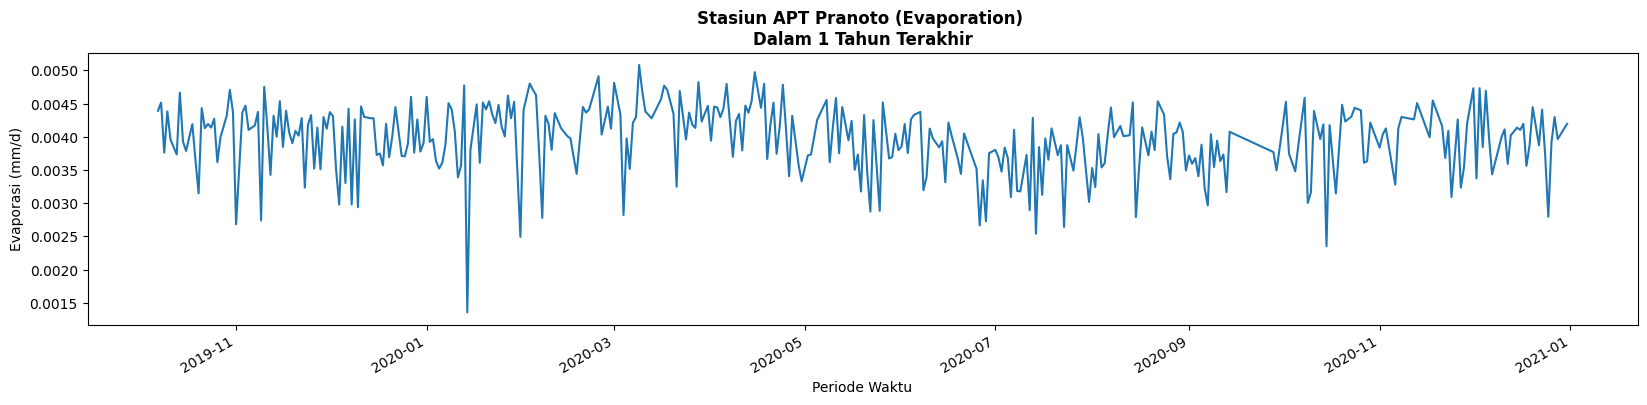

In [8]:
# df_plot['Evaporasi'].plot(figsize=(20, 4))
df_plot['Evaporasi'][-365:].plot(figsize=(20, 4))
plt.xlabel('Periode Waktu')
plt.ylabel('Evaporasi (mm/d)')
plt.title('Stasiun APT Pranoto (Evaporation) \nDalam 1 Tahun Terakhir', weight='bold')

Setelah nilai Evaporasi diketahui, selanjutnya menghitung nilai SPEI.

### **3. SPEI**

Dalam perhitungannya, bisa melakukan implementasi formula secara manual disini:<br/>
[https://spei.csic.es/home.html](https://spei.csic.es/home.html)

Dan terkhusus untuk laporan ini, sementara prosesnya kami serahkan pada library yang telah terukur **(Benchmarked)** bernama :

SPEI:<br/>
[https://github.com/martinvonk/spei](https://github.com/martinvonk/spei)

In [10]:
import spei as si

days = 30 # Jumlah Hari
pe = (df_plot['Curah Hujan'] - df_plot['Evaporasi']).dropna()
spei = si.spei(pe.rolling(days, min_periods=days).sum().dropna())

df_plot['SPEI'] = spei
df_plot['Kategori'] = pd.cut(df_plot['SPEI'], bins=[-np.inf, -2, -1.5, -1, -0.5, np.inf], labels=['EXTREME', 'SEVERE', 'MODERATE', 'MILD', 'NO-DROUGHT'])

df_plot.sample(10)

,Curah Hujan,Evaporasi,SPEI,Kategori
Tanggal,,,,
2018-10-07,0.0,0.003530,-0.272575,NO-DROUGHT
2018-01-13,2.6,0.004291,-0.956779,MILD
2012-12-26,0.0,0.003873,-0.009070,NO-DROUGHT
2016-07-27,18.7,0.004271,-0.925625,MILD
2016-07-07,0.0,0.004314,-1.088618,MODERATE
2017-03-16,9.5,0.004066,-0.570834,MILD
2016-11-22,0.0,0.002911,0.850918,NO-DROUGHT
2019-07-20,0.0,0.004672,-0.077833,NO-DROUGHT
2018-07-05,0.0,0.003410,0.319393,NO-DROUGHT


Text(0, 0.5, 'SPEI')

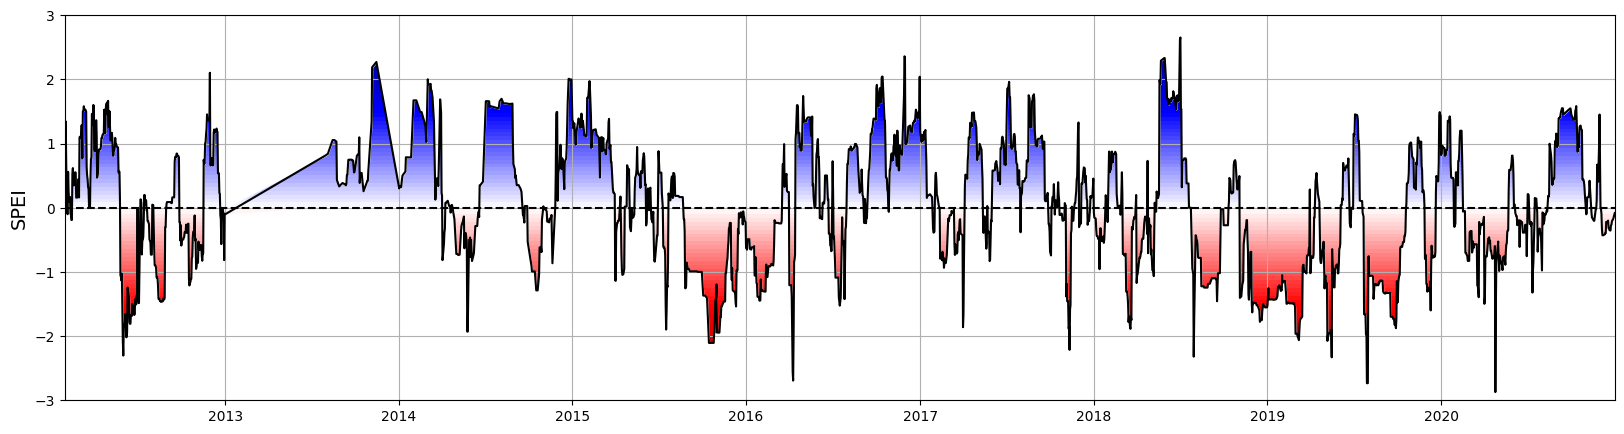

In [11]:
f1, ax = plt.subplots(figsize=(20, 5))
si.plot.si(spei, ax=ax)
ax.grid()
ax.set_ylabel("SPEI", fontsize=14)

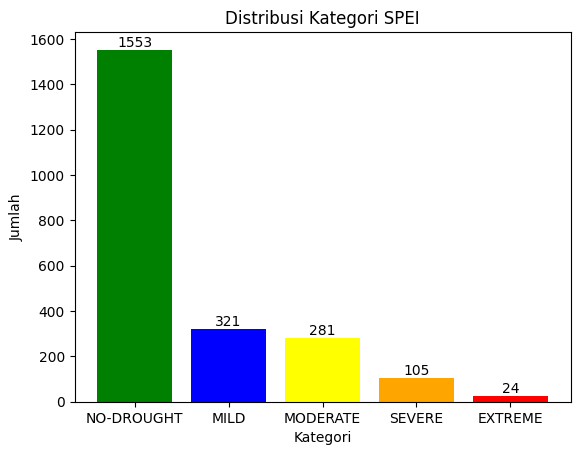

In [12]:
kategori_counts = df_plot['Kategori'].value_counts()

labels = kategori_counts.index
sizes = kategori_counts.values

colors = ['green', 'blue', 'yellow', 'orange', 'red']

plt.bar(labels, sizes, color=colors)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Distribusi Kategori SPEI')

for i, v in enumerate(sizes):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()